---
---



---
---




# **Ejemplo práctico Random Forest**



---
---





---
---


# 1. Importar librerias



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

%matplotlib notebook


# 2. Importar dataset



https://www.kaggle.com/uciml/glass


In [2]:
df = pd.read_csv('glass.csv', sep=',')


# 3. Visualizar dataframe

In [3]:
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 4. Preprocesamiento

In [4]:
df.isna().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
x = df.iloc[:, :9].values
y = df.iloc[:,9].values


In [6]:
x = StandardScaler().fit_transform(x)
x


array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# 5. Dividir dataset entre training y testing set
### Se selecciona aleatoriamente el 70% training y 30% testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


# 6. Modelo Random Forest

In [8]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


RandomForestClassifier()

In [9]:
y_pred = clf.predict(X_test)


# 7. Cálculo accuracy 

In [19]:
print('Accuracy: %.3f' % (metrics.accuracy_score(y_test, y_pred)*100),'%')


Accuracy: 86.154 %


# 8. Importancia de las features

In [11]:
featI = pd.Series(clf.feature_importances_).sort_values(ascending=False)
print(featI)


3    0.161541
2    0.150916
0    0.132739
6    0.120672
1    0.115143
5    0.097471
7    0.093687
4    0.086774
8    0.041058
dtype: float64


<IPython.core.display.Javascript object>


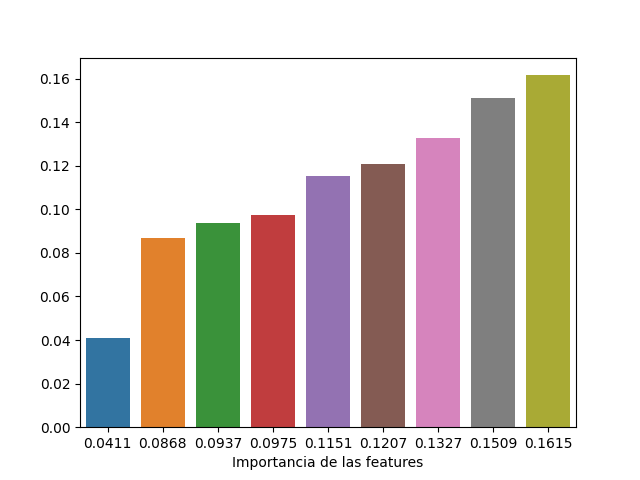

Text(0.5, 0, 'Importancia de las features')

In [12]:
sn.barplot(x=round(featI,4), y=featI)
plt.xlabel('Importancia de las features')


# 9. Visualización árbol random forest

In [13]:
fn = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
cn = ['buildingwindowsfloatprocessed','buildingwindowsnonfloatprocessed',
      'vehiclewindowsfloatprocessed','containers','tableware','headlamps']
cn


['buildingwindowsfloatprocessed',
 'buildingwindowsnonfloatprocessed',
 'vehiclewindowsfloatprocessed',
 'containers',
 'tableware',
 'headlamps']

<IPython.core.display.Javascript object>


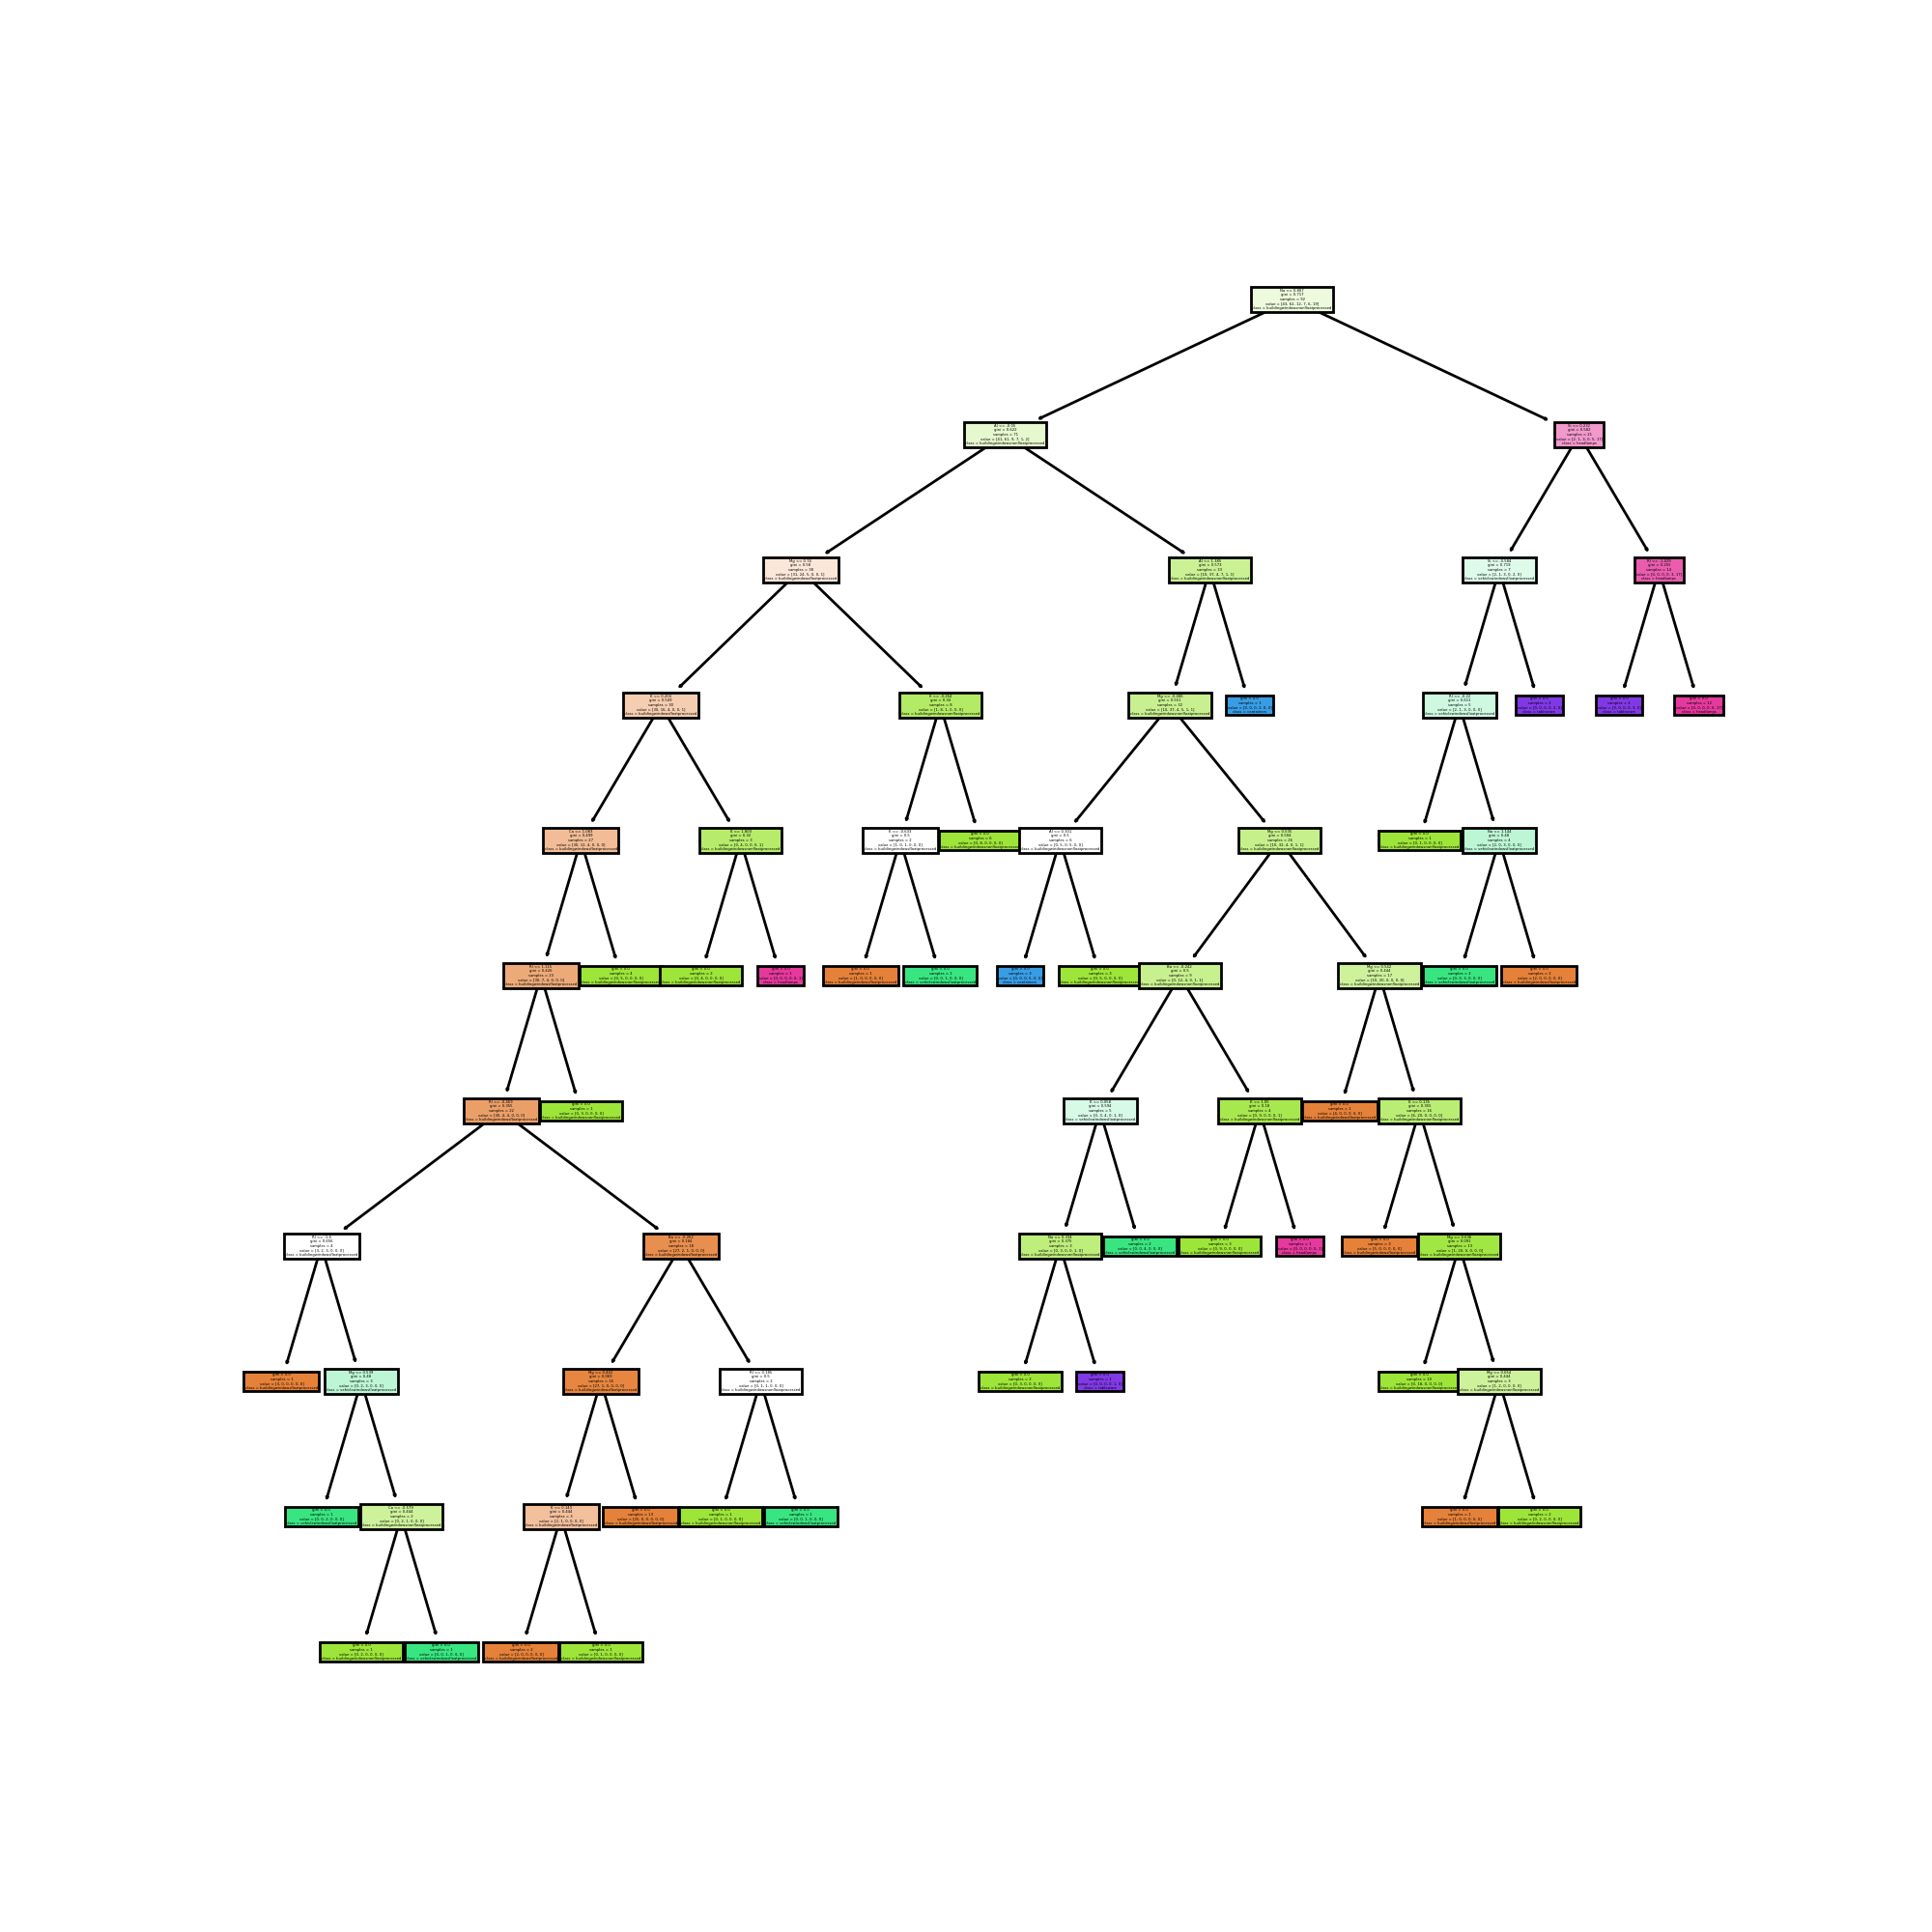

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=200)
tree.plot_tree(clf.estimators_[0],
               feature_names = fn, 
               class_names = cn,
               filled = True);
fig.savefig('rf_individualtree.png')


<IPython.core.display.Javascript object>


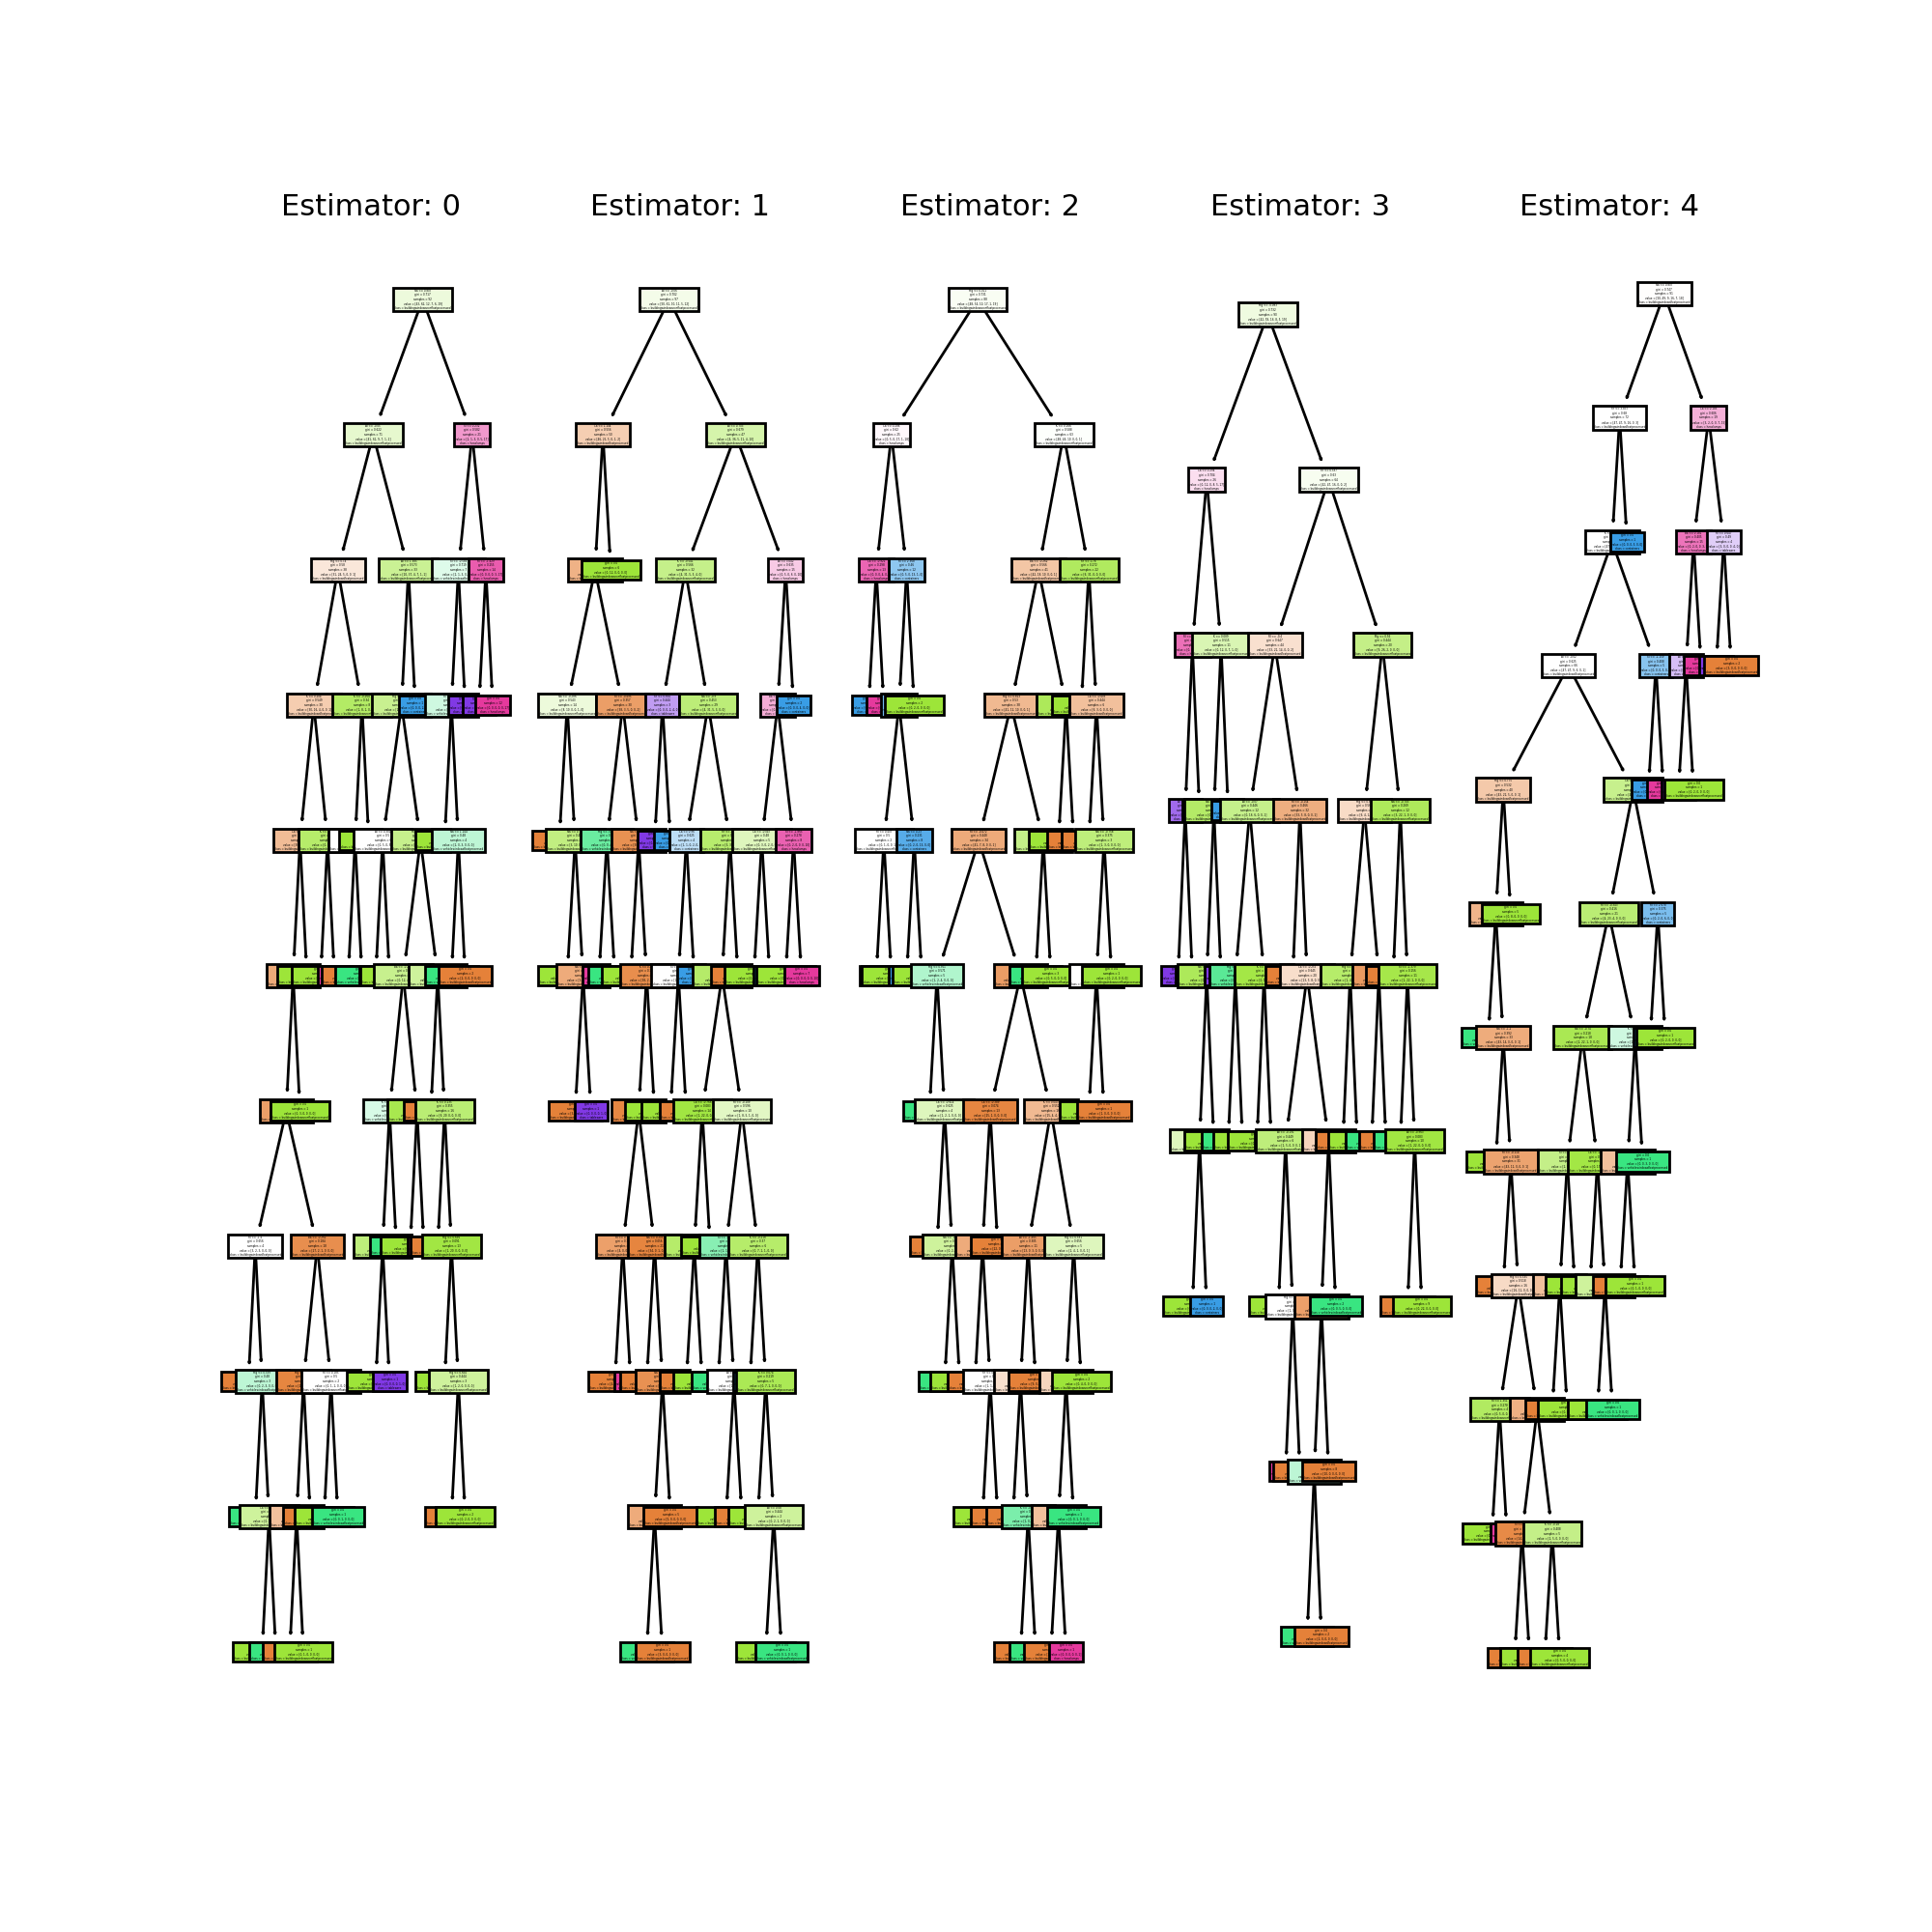

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,10), dpi=200)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = fn, 
                   class_names = cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')
